# INGEST

In [1]:
import numpy as np
import pandas as pd
from random import seed
from random import random
import random
import time
import matplotlib.pyplot as plt
import string

# GENERATE RANDOM DATA

In [2]:
np.random.seed(12345)
n = [5000, 10000, 15000, 20000, 25000]

In [3]:
# Create 5 arrays with integers. 

total_array_int = []
for x in range(0, len(n)):
    array = list(np.random.randint(0, 100000000, size=n[x]))
    total_array_int.append(array)

In [4]:
# Create 5 arrays with floats. 

total_array_float = []
for x in range(0, len(n)):
    array = list(np.random.uniform(0, 100000000, size=n[x]))
    total_array_float.append(array)

In [5]:
# Create 5 attays with strings. 

total_array_string = []
for x in range(0, len(n)):
    array = ["".join(random.choices(string.ascii_letters, k=15)) for _ in range (n[x])]
    total_array_string.append(array)

# DEFINE & CALL FUNCTIONS

In [6]:
def find_smallest(array):
    smallest = array[0]
    smallest_index = 0
    
    for i in range(1, len(array)):
        if array[i] < smallest:
            smallest_index = i 
            smallest = array[i]
    return smallest_index

In [7]:
def selection_sort(array):
    new_array = []
    for i in range(1, len(array)):
        smallest = find_smallest(array)
        value = array.pop(smallest)
        new_array.append(value)
    return new_array   

In [8]:
# Create a function to record sorting time. 

def sort_time(total_array):
    sort_time = []
    for x in range(0, len(n)):
        start_time = time.time()
        sorted_array = selection_sort(total_array[x])
        end_time = time.time()
        sort_time.append((end_time - start_time) * 1000)

    return sort_time

In [9]:
sort_time_int = sort_time(total_array_int)
sort_time_float = sort_time(total_array_float)
sort_time_string = sort_time(total_array_string)

# CREATE TABLE & GRAPH

In [10]:
data = {"Lengths of Array": [n[0], n[1], n[2], n[3], n[4]]}
df = pd.DataFrame(data)
df["Integer Sort Time(ms)"] = sort_time_int
df["Float Sort Time(ms)"] = sort_time_float
df["String Sort Time(ms)"] = sort_time_string
df

,Lengths of Array,Integer Sort Time(ms),Float Sort Time(ms),String Sort Time(ms)
0,5000,658.262968,634.327888,627.328396
1,10000,2660.861731,2557.161570,2519.263744
2,15000,5910.197496,5726.685762,5776.527882
3,20000,10381.244183,10221.673489,10314.443827
4,25000,16177.744865,15976.282835,15807.763338


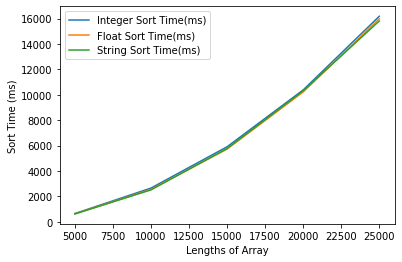

In [11]:
plt.plot(df["Lengths of Array"], df["Integer Sort Time(ms)"], label="Integer Sort Time(ms)")
plt.plot(df["Lengths of Array"], df["Float Sort Time(ms)"], label="Float Sort Time(ms)")
plt.plot(df["Lengths of Array"], df["String Sort Time(ms)"], label="String Sort Time(ms)")
plt.xlabel("Lengths of Array")
plt.ylabel("Sort Time (ms)")
plt.legend()

# CONCLUSION

In this exercise, we've created an algorithm for selection sort, which would sort the data array from smallest to largest. First, it would scan through the whole list to find the smallest number recorded into a new list. After removing the smallest number from the data array, we'll scan the remaining data array to find out the second smallest number. Then we can remove it from the data array and add it to the new list after the previous recorded number. Repeat this step until the total of n numbers are scanned and sorted. This would take n! (factorial n) steps to complete, which gives a runtime of O(nx(1/2)n). However, since constants are being ignored in Big O notation, we would say the runtime for selection sort is O(n^2). 

Later we've compared the selection sort algorithm runtime among 3 different types: integer, float and string. From the resulting table and graph, we can see that the runtimes for all these 3 data types are very similar and close. However, as the size of the data array increase, its running increases exponentially, which alignes with the runtime of O(n^2). 

Selection sort is a very useful algorithm for data engineers, becasue many datasets need to be preprocessed with sorting before being applied in other applications, such as binary search. 